In [11]:
import json
import networkx as nx
from ibsen_networks import (
    load_parsed,
    build_speech_network_and_transitions,
    build_cooccurrence_network,
    export_ibsen_networks,
)
import draw_graphs as dg
import scene_analysis as sa

In [27]:
from importlib import reload

In [28]:
reload(sa)

<module 'scene_analysis' from '/Users/larsj/Documents/Github/HIS_Ibsen_skrifter/scene_analysis.py'>

In [ ]:
all_plays = load_parsed("ibsen_parsed.json")

In [17]:
rosmer = all_plays[19]  # eller filtrere på title
G_speech, trans = build_speech_network_and_transitions(rosmer)
G_co = build_cooccurrence_network(rosmer)

In [18]:
#export_ibsen_networks(all_plays, "ibsen_networks.json")


/Users/larsj/Documents/Github/HIS_Ibsen_skrifter/draw_graphs.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/larsj/Documents/Github/HIS_Ibsen_skrifter/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/larsj/Documents/Github/HIS_Ibsen_skrifter/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 134 (\x86) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


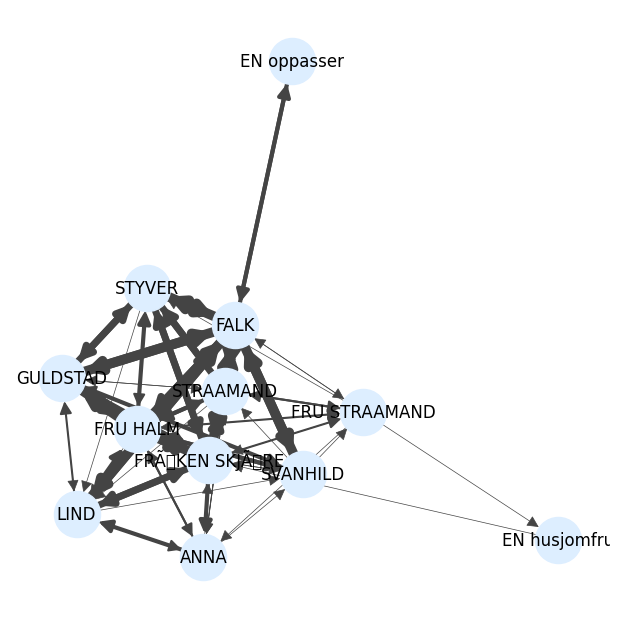

In [19]:
dg.draw_graph_quantiles(G_speech)

In [20]:
#dg.draw_graph_quantiles(G_co)

In [24]:
import pandas as pd

In [25]:
scenes = []
for p in all_plays:  # eller filtrere på title
    G_speech, trans = build_speech_network_and_transitions(p)
    G_co = build_cooccurrence_network(p)
    scenes.append(sa.scene_comedy_table(p, trans))


,play,act,scene,cast_size,possible_pairs,actual_pairs,comedy_factor
0,Når_vi_døde_vågner_1899,1,1,5,10,8,0.800000
1,Når_vi_døde_vågner_1899,2,2,4,6,5,0.833333
2,Når_vi_døde_vågner_1899,3,3,5,10,7,0.700000
0,Fruen_fra_havet_1888,1,1,7,21,16,0.761905
1,Fruen_fra_havet_1888,2,2,7,21,15,0.714286
...,...,...,...,...,...,...,...
2,Gengangere_1881,3,3,5,10,9,0.900000
0,John_Gabriel_Borkman_1896,1,1,5,10,6,0.600000
1,John_Gabriel_Borkman_1896,2,2,5,10,5,0.500000
2,John_Gabriel_Borkman_1896,3,3,6,15,9,0.600000


In [26]:
pd.concat(scenes).style

,play,act,scene,cast_size,possible_pairs,actual_pairs,comedy_factor
0,Når_vi_døde_vågner_1899,1,1,5,10,8,0.800000
1,Når_vi_døde_vågner_1899,2,2,4,6,5,0.833333
2,Når_vi_døde_vågner_1899,3,3,5,10,7,0.700000
0,Fruen_fra_havet_1888,1,1,7,21,16,0.761905
1,Fruen_fra_havet_1888,2,2,7,21,15,0.714286
2,Fruen_fra_havet_1888,3,3,7,21,15,0.714286
3,Fruen_fra_havet_1888,4,4,6,15,12,0.800000
4,Fruen_fra_havet_1888,5,5,8,28,22,0.785714
0,Rosmersholm_1886,1,1,5,10,9,0.900000
1,Rosmersholm_1886,2,2,5,10,8,0.800000


In [16]:
[(i,p["title"]) for  i, p in enumerate(all_plays)]

[(0, 'Når_vi_døde_vågner_1899'),
 (1, 'Fruen_fra_havet_1888'),
 (2, 'Rosmersholm_1886'),
 (3, 'Olaf_Liljekrans,_1._versjon_1857'),
 (4, 'Fru_Inger_til_Østeraad,_1._versjon_1857'),
 (5, 'Brand_1866'),
 (6, 'Fru_Inger_til_Østråt,_2._versjon_1874'),
 (7, 'Kongs-Emnerne_1864'),
 (8, 'Catilina,_2._versjon_1875'),
 (9, 'Svanhild_1860'),
 (10, 'Et_dukkehjem_1879'),
 (11, '[Episk_Brand]_1864-65'),
 (12, 'Gildet_paa_Solhoug,_1._versjon_1856'),
 (13, 'Fjeldfuglen_1859'),
 (14, 'Rypen_i_Justedal_1850'),
 (15, 'Hvide_heste_1886'),
 (16, 'Norma_1851'),
 (17, 'Gildet_på_Solhaug,_2._versjon_1883'),
 (18, 'Kejser_og_Galilæer_1873'),
 (19, 'Kjærlighedens_Komedie_1862'),
 (20, 'Lille_Eyolf_1894'),
 (21, 'Hedda_Gabler_1890'),
 (22, 'Vildanden_1884'),
 (23, 'Hærmændene_på_Helgeland,_2._versjon_1893'),
 (24, 'Kjæmpehøien,_1._versjon_1850'),
 (25, 'Catilina,_1._versjon_1850'),
 (26, 'En_folkefiende_1882'),
 (27, 'De_unges_Forbund_1869'),
 (28, 'Bygmester_Solness_1892'),
 (29, 'Olaf_Liljekrans,_2._versjon_19

In [30]:
# samle én rad per stykke
summary_rows = []
for play in all_plays:
    G_s, trans = build_speech_network_and_transitions(play)
    df_scene = sa.scene_drama_table(play, trans)
    if df_scene.empty:
        continue

    summary_rows.append({
        "play": play["title"],
        "mean_drama": df_scene["drama_factor"].mean(),
        "median_drama": df_scene["drama_factor"].median(),
        "mean_cast": df_scene["cast_size"].mean(),
        "max_cast": df_scene["cast_size"].max(),
        "n_scenes": len(df_scene),
    })

df_play = pd.DataFrame(summary_rows)
df_play


,play,mean_drama,median_drama,mean_cast,max_cast,n_scenes
0,Når_vi_døde_vågner_1899,0.777778,0.800000,4.666667,5,3
1,Fruen_fra_havet_1888,0.755238,0.761905,7.000000,8,5
2,Rosmersholm_1886,0.841667,0.833333,4.500000,5,4
3,"Olaf_Liljekrans,_1._versjon_1857",0.875850,1.000000,3.071429,7,28
4,"Fru_Inger_til_Østeraad,_1._versjon_1857",0.926190,1.000000,2.714286,5,28
5,Brand_1866,0.507879,0.533333,6.400000,12,5
6,"Fru_Inger_til_Østråt,_2._versjon_1874",0.596190,0.600000,5.800000,7,5
7,Kongs-Emnerne_1864,0.277056,0.277056,22.000000,22,1
8,"Catilina,_2._versjon_1875",0.363636,0.333333,10.666667,12,3
9,Svanhild_1860,0.766865,0.819444,5.000000,9,4


In [32]:
def clean_title(title: str) -> str:
    # fjern .xml om det er der
    title = title.replace(".xml", "")
    
    parts = title.split("_")
    # siste del er vanligvis årstall → dropp den hvis den er tall
    if parts[-1].isdigit():
        parts = parts[:-1]
    
    # slå sammen igjen med mellomrom
    label = " ".join(parts)
    # normaliser mellomrom
    label = " ".join(label.split())
    return label


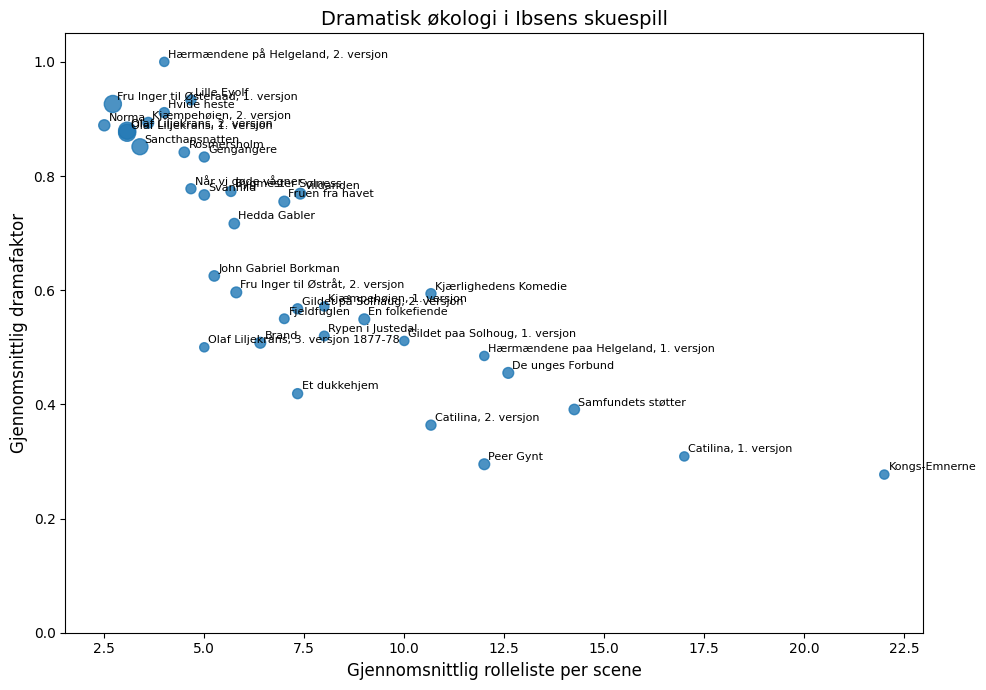

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))

x = df_play["mean_cast"]
y = df_play["mean_drama"]
sizes = 40 + df_play["n_scenes"] * 4   # litt større pr. scene

scatter = ax.scatter(x, y, s=sizes, alpha=0.8)

# korte etiketter: ta bare første del av tittelen
def short_label(title: str) -> str:
    # f.eks. "Rosmersholm_1886" -> "Rosmersholm"
    return title.split("_")[0].replace(",", "")

for _, row in df_play.iterrows():
    ax.annotate(
        clean_title(row["play"]),
        (row["mean_cast"], row["mean_drama"]),
        textcoords="offset points",
        xytext=(3, 3),
        fontsize=8,
    )

ax.set_xlabel("Gjennomsnittlig rolleliste per scene", fontsize=12)
ax.set_ylabel("Gjennomsnittlig dramafaktor", fontsize=12)
ax.set_title("Dramatisk økologi i Ibsens skuespill", fontsize=14)

ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()
# til plakat:
# plt.savefig("ibsen_drama_ecology.png", dpi=300)
